https://www.javatpoint.com/apriori-algorithm-in-machine-learning

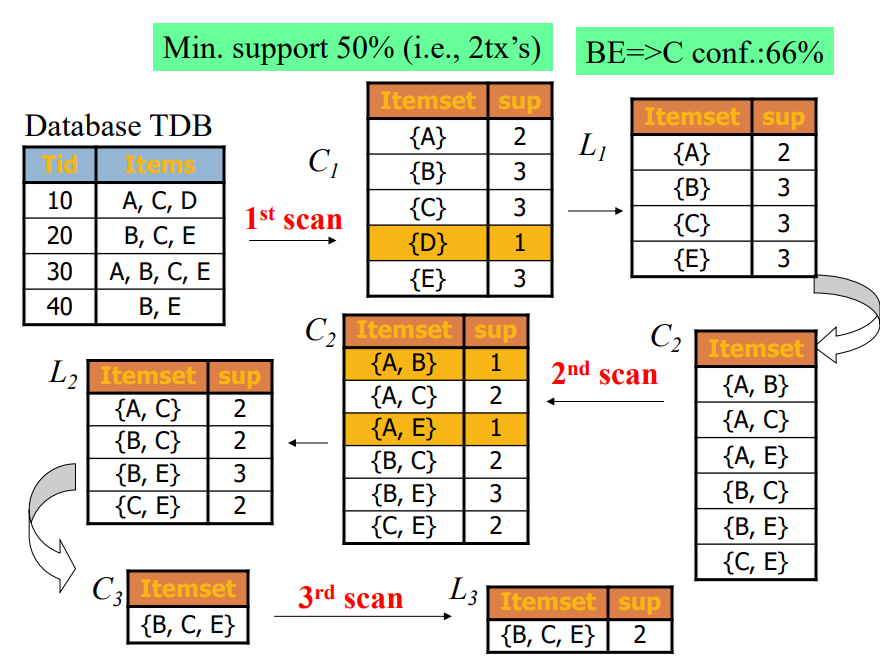

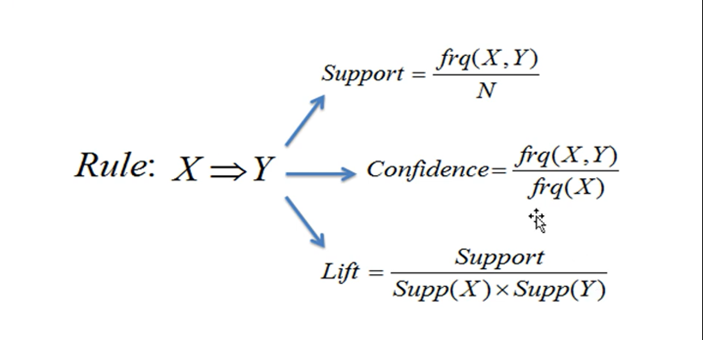

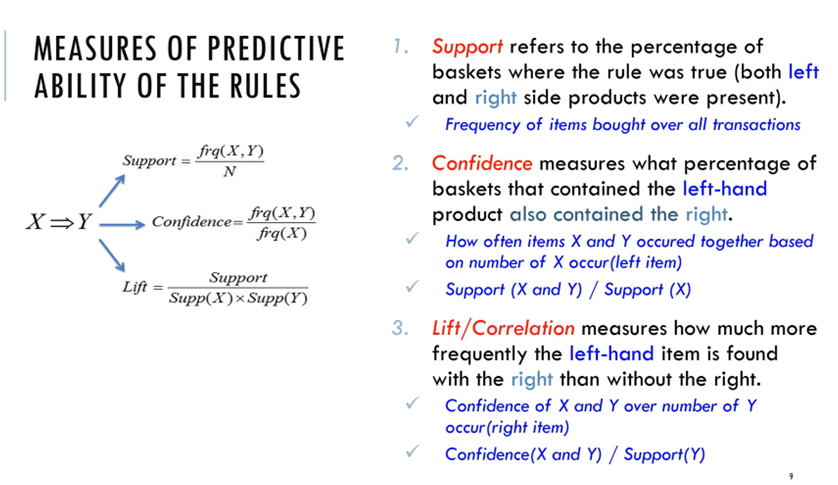

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data=pd.read_csv("C:/Users/91799/OneDrive/Desktop/python basics/Machine Learning- Unsupervised/Groceries_dataset.csv",parse_dates=['Date'])    #parse used to notify the date column for the computer
data

C:\Users\91799\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\91799\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\91799\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\91799\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '23-12-2015' in DD/MM/YYYY format. Provide format or specif

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk
...,...,...,...
38760,4471,2014-08-10,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-03-12,fruit/vegetable juice


In [34]:
data.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [36]:
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [37]:
print('date from',data.Date.min(),'to',data.Date.max())    #to sort date from lowest to larger

date from 2014-01-01 00:00:00 to 2015-12-30 00:00:00


In [38]:
data['itemDescription']

0               tropical fruit
1                   whole milk
2                    pip fruit
3             other vegetables
4                   whole milk
                 ...          
38760            sliced cheese
38761                    candy
38762                 cake bar
38763    fruit/vegetable juice
38764                 cat food
Name: itemDescription, Length: 38765, dtype: object

In [39]:
data['Year']=data['Date'].dt.year     #to gets year of that date
data['Month']=data['Date'].dt.month    #to gets the month of that date
data['Day']=data['Date'].dt.day
data['day-week']=data['Date'].dt.day_name()

In [40]:
data

,Member_number,Date,itemDescription,Year,Month,Day,day-week
0,1808,2015-07-21,tropical fruit,2015,7,21,Tuesday
1,2552,2015-05-01,whole milk,2015,5,1,Friday
2,2300,2015-09-19,pip fruit,2015,9,19,Saturday
3,1187,2015-12-12,other vegetables,2015,12,12,Saturday
4,3037,2015-01-02,whole milk,2015,1,2,Friday
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,Sunday
38761,2022,2014-02-23,candy,2014,2,23,Sunday
38762,1097,2014-04-16,cake bar,2014,4,16,Wednesday
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,Wednesday


In [41]:
data_new=pd.DataFrame(data.groupby('Date')['itemDescription'].nunique().index)     # or can used as member_number instead of itemdescription
data_new

,Date
0,2014-01-01
1,2014-01-02
2,2014-01-03
3,2014-01-04
4,2014-01-05
...,...
723,2015-12-26
724,2015-12-27
725,2015-12-28
726,2015-12-29


In [42]:
data_new['member_count']=data.groupby('Date')['Member_number'].nunique().values# shows the memberscount of that particular date
data_new['Items_count']=data.groupby('Date')['itemDescription'].nunique().values   # here also nunique
data_new['Items']=data.groupby('Date')['itemDescription'].unique().values   #here unique means list,not the number

data_new

,Date,member_count,Items_count,Items
0,2014-01-01,21,30,"[cleaner, sausage, tropical fruit, whole milk,..."
1,2014-01-02,29,45,"[other vegetables, pip fruit, frankfurter, sug..."
2,2014-01-03,24,36,"[sausage, meat, sugar, bottled beer, whole mil..."
3,2014-01-04,28,33,"[frankfurter, pastry, salty snack, bottled bee..."
4,2014-01-05,20,31,"[sausage, root vegetables, whipped/sour cream,..."
...,...,...,...,...
723,2015-12-26,15,26,"[bottled water, herbs, sausage, pip fruit, chi..."
724,2015-12-27,21,43,"[chicken, frankfurter, other vegetables, tropi..."
725,2015-12-28,19,37,"[onions, root vegetables, citrus fruit, rolls/..."
726,2015-12-29,22,33,"[pork, UHT-milk, whole milk, sausage, specialt..."


In [43]:
data_new.set_index('Date',inplace=True)
data_new

,member_count,Items_count,Items
Date,,,
2014-01-01,21,30,"[cleaner, sausage, tropical fruit, whole milk,..."
2014-01-02,29,45,"[other vegetables, pip fruit, frankfurter, sug..."
2014-01-03,24,36,"[sausage, meat, sugar, bottled beer, whole mil..."
2014-01-04,28,33,"[frankfurter, pastry, salty snack, bottled bee..."
2014-01-05,20,31,"[sausage, root vegetables, whipped/sour cream,..."
...,...,...,...
2015-12-26,15,26,"[bottled water, herbs, sausage, pip fruit, chi..."
2015-12-27,21,43,"[chicken, frankfurter, other vegetables, tropi..."
2015-12-28,19,37,"[onions, root vegetables, citrus fruit, rolls/..."


In [44]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [45]:
from apyori import apriori

transactions=data_new['Items'].tolist()   #CONVERTING DATAFRAME TO LIST
transactions

[array(['cleaner', 'sausage', 'tropical fruit', 'whole milk',
        'citrus fruit', 'onions', 'other vegetables', 'berries',
        'hamburger meat', 'bottled water', 'butter', 'yogurt', 'waffles',
        'soda', 'sliced cheese', 'curd', 'specialty chocolate',
        'shopping bags', 'flower (seeds)', 'coffee', 'whipped/sour cream',
        'frozen potato products', 'candles', 'bottled beer',
        'Instant food products', 'frozen vegetables', 'brown bread',
        'domestic eggs', 'dishes', 'chocolate'], dtype=object),
 array(['other vegetables', 'pip fruit', 'frankfurter', 'sugar',
        'frozen vegetables', 'beef', 'waffles', 'meat', 'root vegetables',
        'pastry', 'butter', 'brown bread', 'ice cream', 'soda',
        'rolls/buns', 'chicken', 'citrus fruit', 'white bread',
        'frozen fish', 'sparkling wine', 'cream cheese ', 'whole milk',
        'tropical fruit', 'fruit/vegetable juice', 'yogurt',
        'condensed milk', 'curd', 'soft cheese', 'canned beer', '

In [46]:
rules=apriori(transactions=transactions,min_support=0.0030,min_confidence=.01,min_lift=3,min_length=2,max_length=2)
results=list(rules)
results

[RelationRecord(items=frozenset({'liqueur', 'Instant food products'}), support=0.004120879120879121, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'liqueur'}), confidence=0.052631578947368425, lift=4.257309941520468), OrderedStatistic(items_base=frozenset({'liqueur'}), items_add=frozenset({'Instant food products'}), confidence=0.33333333333333337, lift=4.257309941520468)]),
 RelationRecord(items=frozenset({'cleaner', 'abrasive cleaner'}), support=0.005494505494505495, ordered_statistics=[OrderedStatistic(items_base=frozenset({'abrasive cleaner'}), items_add=frozenset({'cleaner'}), confidence=0.18181818181818182, lift=4.564263322884013), OrderedStatistic(items_base=frozenset({'cleaner'}), items_add=frozenset({'abrasive cleaner'}), confidence=0.13793103448275865, lift=4.564263322884013)]),
 RelationRecord(items=frozenset({'artif. sweetener', 'tea'}), support=0.004120879120879121, ordered_statistics=[OrderedStatistic(items_base=

In [47]:
#working of indices
num=[[(2,1),(3,4),(7,2)],[(3,1),(8,4),(7,9)],[(2,1),(3,4),(7,2)]]
num[1][2][1]

9

In [48]:
results[1]

RelationRecord(items=frozenset({'cleaner', 'abrasive cleaner'}), support=0.005494505494505495, ordered_statistics=[OrderedStatistic(items_base=frozenset({'abrasive cleaner'}), items_add=frozenset({'cleaner'}), confidence=0.18181818181818182, lift=4.564263322884013), OrderedStatistic(items_base=frozenset({'cleaner'}), items_add=frozenset({'abrasive cleaner'}), confidence=0.13793103448275865, lift=4.564263322884013)])

In [26]:
results[2]

RelationRecord(items=frozenset({'artif. sweetener', 'tea'}), support=0.004120879120879121, ordered_statistics=[OrderedStatistic(items_base=frozenset({'artif. sweetener'}), items_add=frozenset({'tea'}), confidence=0.10714285714285714, lift=3.0), OrderedStatistic(items_base=frozenset({'tea'}), items_add=frozenset({'artif. sweetener'}), confidence=0.11538461538461539, lift=3.0)])

In [30]:
tuple(results[2][0])

('artif. sweetener', 'tea')

In [18]:
results[0]

RelationRecord(items=frozenset({'Instant food products', 'liqueur'}), support=0.004120879120879121, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'liqueur'}), confidence=0.052631578947368425, lift=4.257309941520468), OrderedStatistic(items_base=frozenset({'liqueur'}), items_add=frozenset({'Instant food products'}), confidence=0.33333333333333337, lift=4.257309941520468)])

In [19]:
results[0][2]

[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'liqueur'}), confidence=0.052631578947368425, lift=4.257309941520468),
 OrderedStatistic(items_base=frozenset({'liqueur'}), items_add=frozenset({'Instant food products'}), confidence=0.33333333333333337, lift=4.257309941520468)]

In [20]:
results[0][2][0][0]

frozenset({'Instant food products'})

In [21]:
results[0][2][0][1]

frozenset({'liqueur'})

In [22]:
tuple(results[0][2][0][0])

('Instant food products',)

In [23]:
tuple(results[0][2][0][0])[0]

'Instant food products'

In [24]:
#similarly
tuple(results[0][2][0][1])[0]

'liqueur'

https://www.javatpoint.com/association-rule-learning

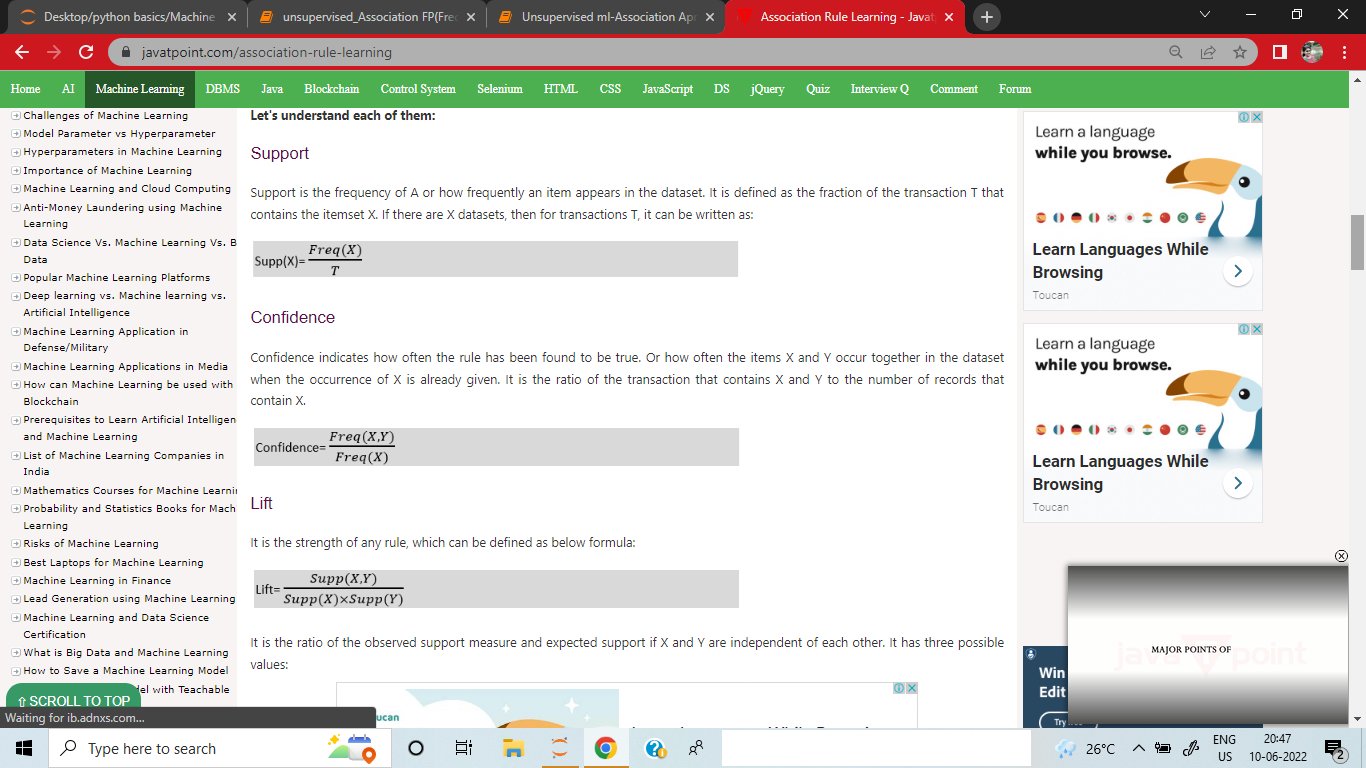

In [49]:
def inspect(results):
    lhs=[tuple(result[2][0][0])[0] for result in results]#item1
    rhs=[tuple(result[2][0][1])[0] for result in results]#item2
    
    support=[result[1] for result in results]
    confidence=[result[2][0][2] for result in results]
    lift=[result[2][0][3] for result in results]
    
    return list(zip(lhs,rhs,support,confidence,lift))

In [26]:
lhs=[tuple(result[2][0][0])[0] for result in results]
lhs

['Instant food products',
 'abrasive cleaner',
 'artif. sweetener',
 'baking powder',
 'bathroom cleaner',
 'candles',
 'canned fruit',
 'canned fruit',
 'cereals',
 'cleaner',
 'cleaner',
 'cocoa drinks',
 'cooking chocolate',
 'cookware',
 'curd cheese',
 'decalcifier',
 'detergent',
 'dog food',
 'female sanitary products',
 'female sanitary products',
 'female sanitary products',
 'female sanitary products',
 'finished products',
 'flower (seeds)',
 'flower (seeds)',
 'frozen fish',
 'frozen fruits',
 'hair spray',
 'hair spray',
 'honey',
 'house keeping products',
 'light bulbs',
 'liqueur',
 'liqueur',
 'liquor',
 'make up remover',
 'male cosmetics',
 'male cosmetics',
 'oil',
 'potato products',
 'ready soups',
 'rice',
 'rice',
 'rubbing alcohol',
 'rubbing alcohol',
 'rum',
 'salad dressing',
 'skin care',
 'softener']

In [27]:
rhs=[tuple(result[2][0][1])[0] for result in results]
rhs

['liqueur',
 'cleaner',
 'tea',
 'decalcifier',
 'meat spreads',
 'whisky',
 'jam',
 'sauces',
 'cookware',
 'cooking chocolate',
 'rum',
 'finished products',
 'jam',
 'spices',
 'light bulbs',
 'pet care',
 'make up remover',
 'specialty vegetables',
 'honey',
 'prosecco',
 'softener',
 'specialty fat',
 'whisky',
 'honey',
 'skin care',
 'rubbing alcohol',
 'light bulbs',
 'liquor (appetizer)',
 'vinegar',
 'mustard',
 'potato products',
 'tidbits',
 'pickled vegetables',
 'rum',
 'toilet cleaner',
 'seasonal products',
 'organic sausage',
 'prosecco',
 'salad dressing',
 'rum',
 'sauces',
 'soap',
 'syrup',
 'semi-finished bread',
 'turkey',
 'syrup',
 'spread cheese',
 'tea',
 'specialty vegetables']

In [28]:
result_csv=pd.DataFrame(inspect(results),columns=['Item1','Item2','support','confidence','lift'])
result_csv.head(10)

,Item1,Item2,support,confidence,lift
0,Instant food products,liqueur,0.004121,0.052632,4.257310
1,abrasive cleaner,cleaner,0.005495,0.181818,4.564263
2,artif. sweetener,tea,0.004121,0.107143,3.000000
3,baking powder,decalcifier,0.008242,0.054545,4.412121
4,bathroom cleaner,meat spreads,0.004121,0.187500,3.900000
5,candles,whisky,0.004121,0.049180,4.475410
6,canned fruit,jam,0.004121,0.142857,3.058824
7,canned fruit,sauces,0.005495,0.190476,3.224806
8,cereals,cookware,0.005495,0.095238,4.078431
9,cleaner,cooking chocolate,0.004121,0.103448,5.020690


In [29]:
#arranging it in descending order
result_csv.nlargest(n=10,columns='lift')

,Item1,Item2,support,confidence,lift
33,liqueur,rum,0.004121,0.333333,8.088889
26,frozen fruits,light bulbs,0.004121,0.272727,7.090909
44,rubbing alcohol,turkey,0.004121,0.600000,5.983562
18,female sanitary products,honey,0.005495,0.100000,5.600000
9,cleaner,cooking chocolate,0.004121,0.103448,5.020690
48,softener,specialty vegetables,0.004121,0.073171,4.842572
19,female sanitary products,prosecco,0.006868,0.125000,4.789474
22,finished products,whisky,0.004121,0.052632,4.789474
28,hair spray,vinegar,0.004121,0.333333,4.758170
31,light bulbs,tidbits,0.005495,0.142857,4.727273



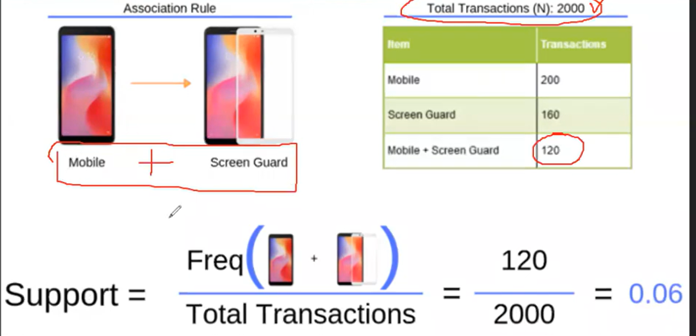

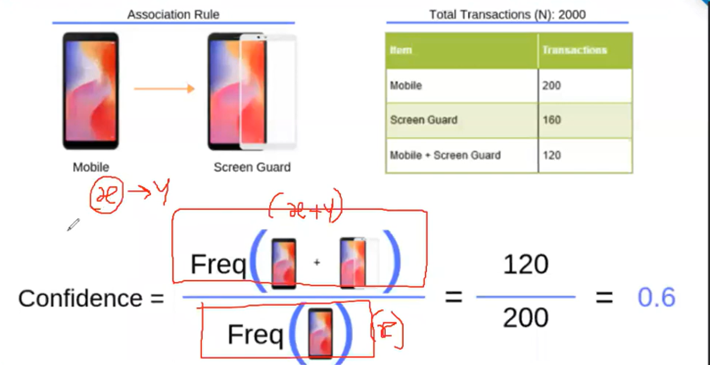

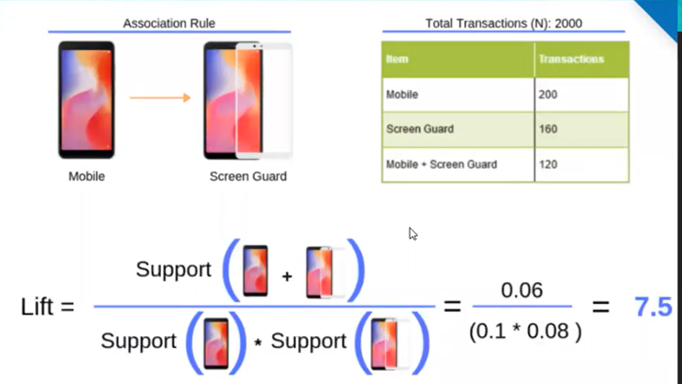

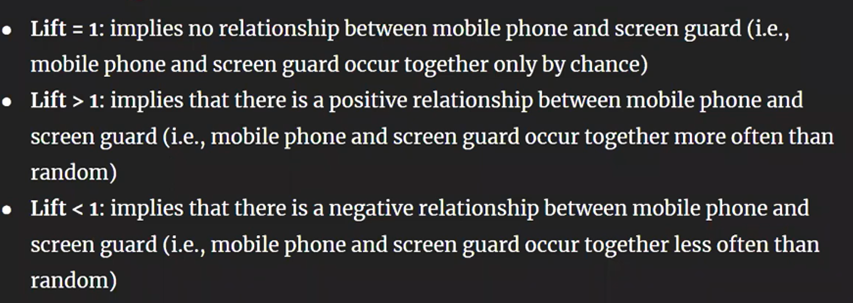